In [11]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

In [12]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL=3
EPOCHS=50



In [13]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Training/Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
                    )

Found 3000 files belonging to 2 classes.


In [14]:
class_names=dataset.class_names
class_names


['no', 'yes']

In [15]:
len(dataset)



94

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1]


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


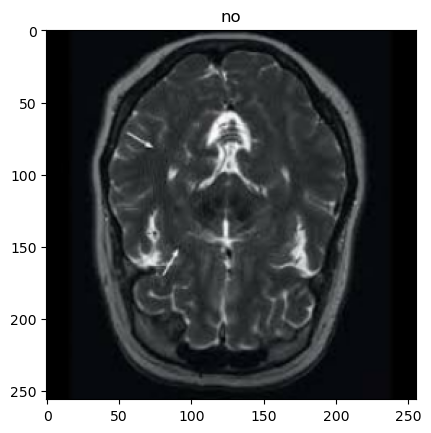

In [16]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

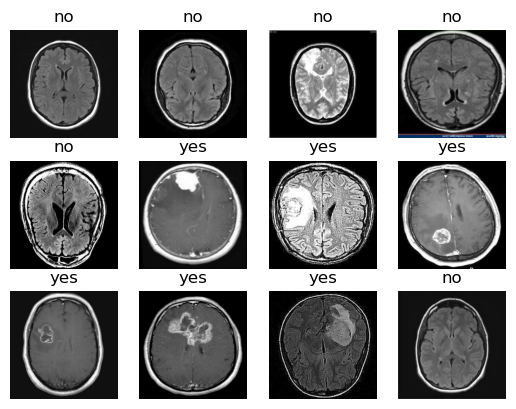

In [8]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [9]:
len(dataset)

94

In [10]:
#80% ==> training 
#20% ==> 10% validation,10% test


In [11]:
train_size=0.8
len(dataset)*train_size


75.2

In [17]:
train_ds=dataset.take(75)
len(train_ds)

75

In [21]:
test_ds =dataset.skip(75)
len(test_ds
   )

19

In [19]:
val_size=0.1
len(dataset)*val_size


9.4

In [22]:
val_ds=test_ds.take(9)
len(val_ds)

9

In [16]:
test_ds=test_ds.skip(9)
len(test_ds)

10

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size,seed=12)
    train_size= int(train_split * ds_size)
    val_size =int(val_split * ds_size)
    train_ds=ds.take(train_size)
                
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)


In [19]:
len(train_ds)

75

In [20]:
len(val_ds)

9

In [21]:
len(test_ds)

10

In [22]:
#video:1-26:37
#Read image from the disk and 
#have to watch :SHUFFLE VIDEO
#prefetch & Batch:-CPU reading batch 1 ,then GPU training 1,that time CPU reading 
# batch 2;

In [9]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


NameError: name 'train_ds' is not defined

In [24]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])


In [25]:
#Data Augmentation,Random Flip,Random Rotation;
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [30]:
#model Building
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=2;
model= models.Sequential([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32, (3,3),activation='relu',input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3),activation='relu'), layers.Conv2D(64, (3,3),activation='relu',input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3),activation='relu',input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3),activation='relu',input_shape=input_shape),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [27]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [32]:
#compile
#adam is a famous Optimizer
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:

history=model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

  

Epoch 1/50
75/75 [==============================] - 148s 2s/step - loss: 0.6359 - accuracy: 0.6108 - val_loss: 0.5170 - val_accuracy: 0.7812
Epoch 2/50
75/75 [==============================] - 120s 2s/step - loss: 0.4879 - accuracy: 0.7897 - val_loss: 0.3643 - val_accuracy: 0.8368
Epoch 3/50
75/75 [==============================] - 121s 2s/step - loss: 0.4400 - accuracy: 0.8039 - val_loss: 0.3811 - val_accuracy: 0.8264
Epoch 4/50
75/75 [==============================] - 116s 2s/step - loss: 0.4008 - accuracy: 0.8223 - val_loss: 0.2890 - val_accuracy: 0.8750
Epoch 5/50
75/75 [==============================] - 120s 2s/step - loss: 0.3548 - accuracy: 0.8537 - val_loss: 0.2891 - val_accuracy: 0.8750
Epoch 6/50
75/75 [==============================] - 119s 2s/step - loss: 0.3416 - accuracy: 0.8629 - val_loss: 0.2704 - val_accuracy: 0.8854
Epoch 7/50
75/75 [==============================] - 118s 2s/step - loss: 0.3158 - accuracy: 0.8671 - val_loss: 0.2265 - val_accuracy: 0.9028
Epoch 8/50
75

In [35]:
#Batch_size:32,Dataset size:3000-Random 32 images 1 batch:
#iterations:3000/32=95;95 batches;
#Epochs:1 Epoch:1 batch:32 image Trainig,2nd batch:32,....95 Batch Train,
#Epoch 2:SAme:
#....50 times 50 Epochs..THat MEans :3000*50=150000 times Images will be forward and backward
#Epoch:1 Forward pass,1 Backward pass
import tensorflow as tf

# Check available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    for gpu in gpus:
        print("GPU device name:", gpu.name)
        print("GPU memory:", tf.config.experimental.get_memory_info(gpu).device / (1024 ** 3), "GB")
else:
    print("No GPUs available.")


No GPUs available.


In [37]:
scores = model.evaluate(test_ds)
scores



10/10 [==============================] - 17s 358ms/step - loss: 0.0864 - accuracy: 0.9750


[0.08642648160457611, 0.9750000238418579]

In [38]:
history


In [39]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 75}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
type(history.history['loss'])


list

In [42]:
len(history.history['loss'])


50

In [43]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.6359227299690247,
 0.48786869645118713,
 0.43997272849082947,
 0.4007706046104431,
 0.3548136353492737]

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

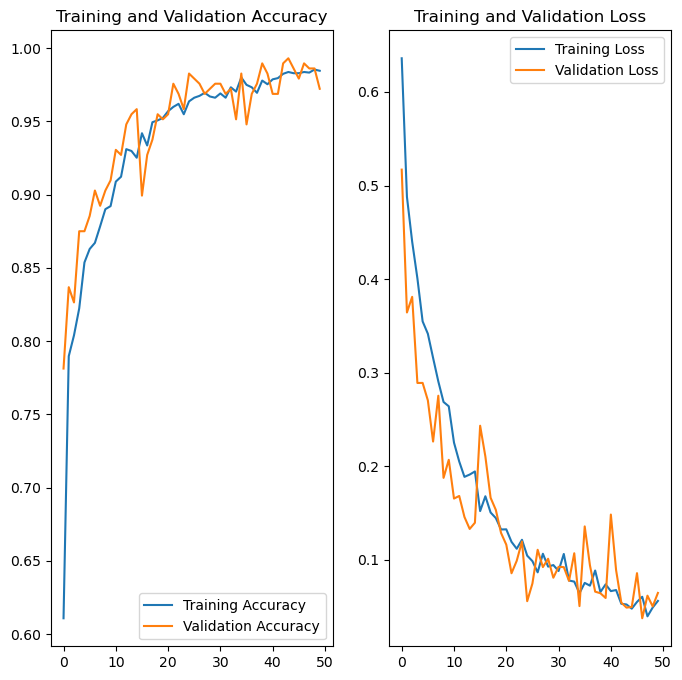

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: no
1/1 [==============================] - 1s 660ms/step
predicted label: no


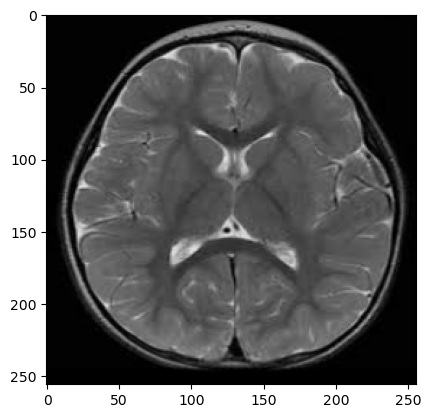

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


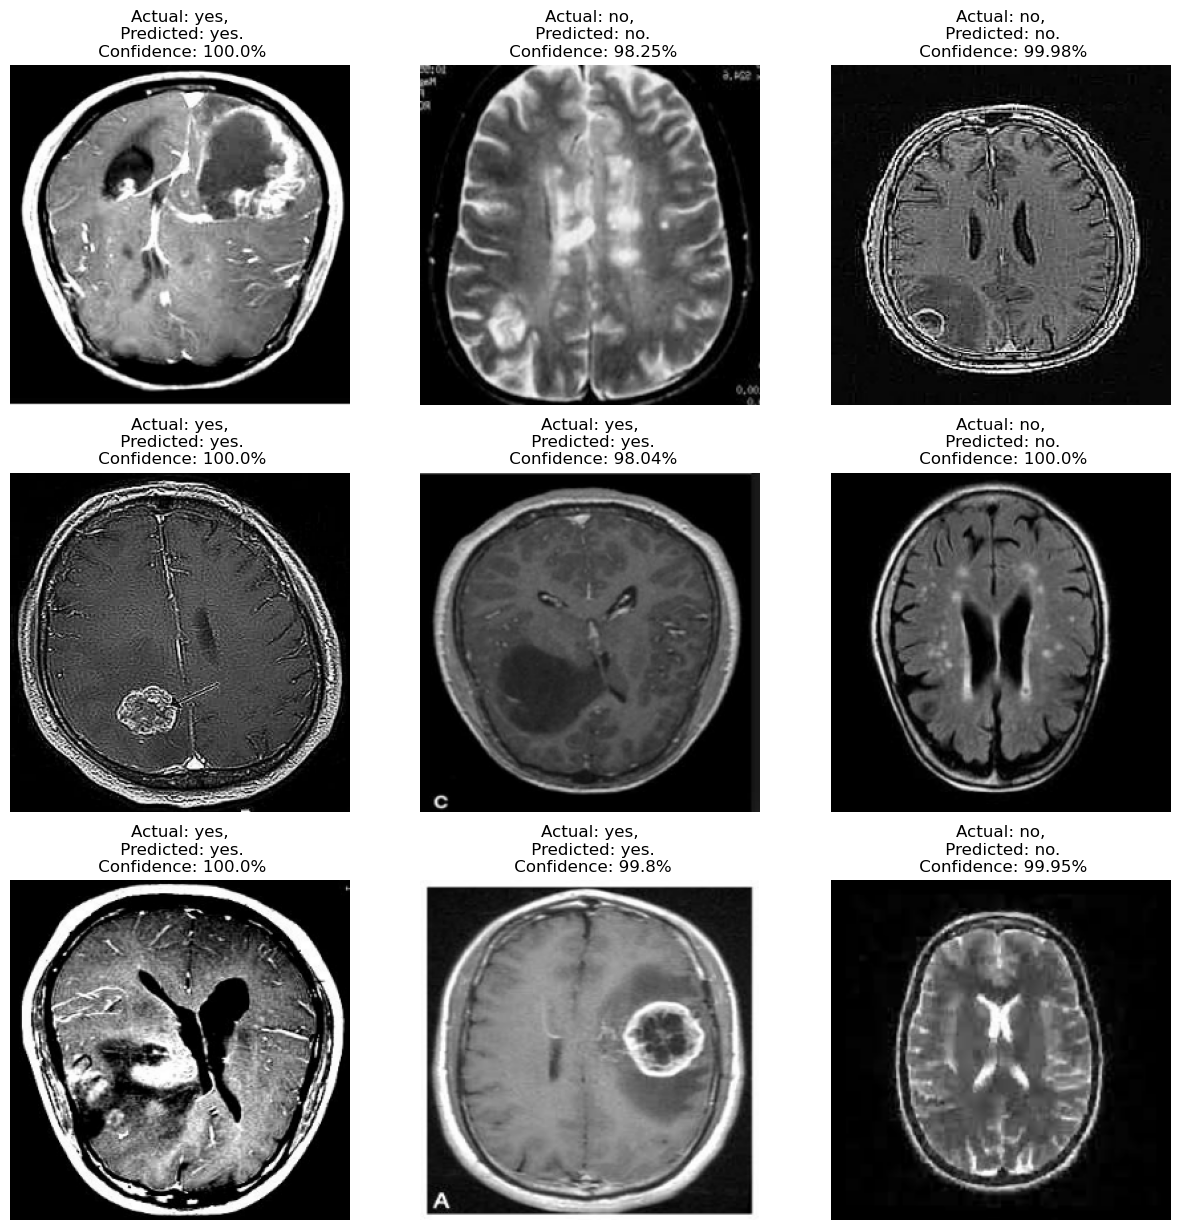

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


In [78]:
#model.save("../BrainTumor.h5")

1/1 [==============================] - 0s 32ms/step
Predicted class: yes
Confidence: 98.01%


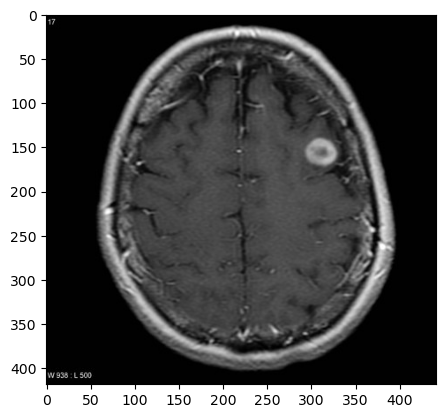

In [83]:

from PIL import Image
import numpy as np

# Load the image
image = Image.open('Tumor.jpeg')

# Convert the PIL image to a NumPy array
image_np = np.array(image)
plt.imshow(image_np.astype("uint8"))
# Perform any necessary preprocessing here (e.g., resizing, normalization)
# You should match the preprocessing steps used during model training.

# Pass the preprocessed image as input to your model's predict method
predictions = model.predict(np.expand_dims(image_np, axis=0))

# Process the predictions as needed (e.g., getting class labels or confidence scores)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = 100 * np.max(predictions[0])

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")


In [25]:
# #BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL
# resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(256,256,3),
#                    pooling='avg',classes=2,
#                    weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(2, activation='softmax'))
     

In [32]:
# resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])




In [33]:
# history2 = resnet_model.fit(
#     train_ds,
#     epochs=50,
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds, 
  
# )

Epoch 1/50


ValueError: in user code:

    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [ ]:
# Define your batch size and image size
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

# Create a Sequential model
resnet_model = Sequential()

# Load the ResNet-50 model with pretrained weights and remove the top classification layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    pooling='avg',
    weights='imagenet'
)

# Make all layers in the pretrained model trainable
for layer in pretrained_model.layers:
    layer.trainable = True

# Add the pretrained model to your custom model
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Change the output units to 1 for binary classification

# Compile the model with an appropriate loss function for binary classification
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have defined train_ds and val_ds correctly
history = resnet_model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
27/75 [=========>....................] - ETA: 11:16 - loss: 0.5722 - accuracy: 0.8264

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

In [39]:
scores = model.evaluate(test_ds)

NameError: name 'model' is not defined